<a href="https://colab.research.google.com/github/LikhithaReddyp2/CatAndDogClassifier/blob/main/Cat_and_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
seed = 42
np.random.seed(seed)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/PetImages/train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/PetImages/test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 12020 images belonging to 2 classes.
Found 4993 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=10,
    validation_data=test_generator,
    validation_steps=10
)

plt.figure(figsize=(12, 4))

Epoch 1/10
15/15 [==============================] - 209s 14s/step - loss: 0.5696 - accuracy: 0.7229 - val_loss: 0.8940 - val_accuracy: 0.5031
Epoch 2/10
15/15 [==============================] - 186s 13s/step - loss: 0.4869 - accuracy: 0.8125 - val_loss: 1.1800 - val_accuracy: 0.4844
Epoch 3/10
15/15 [==============================] - 190s 13s/step - loss: 0.5529 - accuracy: 0.7792 - val_loss: 0.8414 - val_accuracy: 0.4969
Epoch 4/10
15/15 [==============================] - 163s 11s/step - loss: 0.4746 - accuracy: 0.8062 - val_loss: 0.9531 - val_accuracy: 0.5031
Epoch 5/10
15/15 [==============================] - 159s 11s/step - loss: 0.4859 - accuracy: 0.7949 - val_loss: 0.7458 - val_accuracy: 0.5063
Epoch 6/10
15/15 [==============================] - 178s 12s/step - loss: 0.4851 - accuracy: 0.8062 - val_loss: 0.7810 - val_accuracy: 0.4938
Epoch 7/10
15/15 [==============================] - 179s 12s/step - loss: 0.5097 - accuracy: 0.7792 - val_loss: 0.8387 - val_accuracy: 0.4906
Epoch 

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

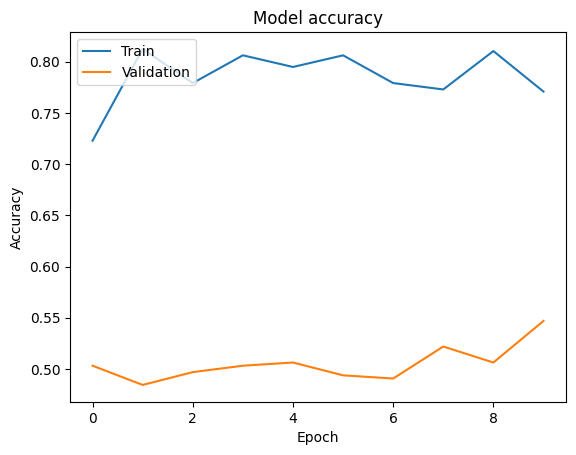

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

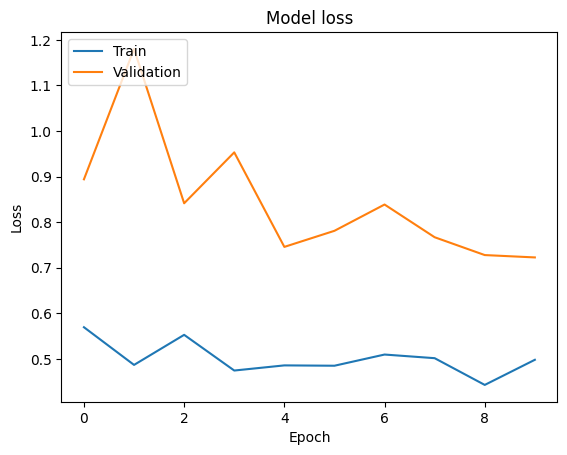

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:

score = model.evaluate(test_generator, steps=15)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

15/15 [==============================] - 61s 4s/step - loss: 0.7626 - accuracy: 0.5000
Test Loss: 0.762557864189148
Test Accuracy: 0.5


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
model.save('cat_dog_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 29ms/step


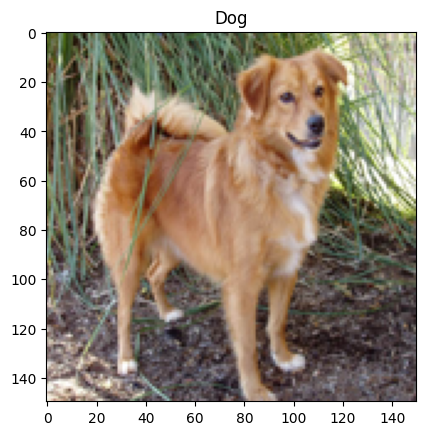

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np


img_path = "/content/drive/MyDrive/PetImages/test/dog/10003.jpg"
img = image.load_img(img_path)
img = img.resize((150, 150))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = "Dog"
else:
    label = "Cat"

plt.imshow(img)
plt.title(label)
plt.show()
